In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
dataset = pd.read_csv('FuelConsumption.csv')
dataset.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 249 non-null    int64  
 1   MAKE                      249 non-null    object 
 2   MODEL                     249 non-null    object 
 3   VEHICLECLASS              249 non-null    object 
 4   ENGINESIZE                249 non-null    float64
 5   CYLINDERS                 249 non-null    int64  
 6   TRANSMISSION              249 non-null    object 
 7   FUELTYPE                  249 non-null    object 
 8   FUELCONSUMPTION_CITY      249 non-null    float64
 9   FUELCONSUMPTION_HWY       249 non-null    float64
 10  FUELCONSUMPTION_COMB      249 non-null    float64
 11  FUELCONSUMPTION_COMB_MPG  249 non-null    int64  
 12  CO2EMISSIONS              249 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 25.4+ KB


In [4]:
dataset.describe

<bound method NDFrame.describe of      MODELYEAR       MAKE          MODEL             VEHICLECLASS  ENGINESIZE  \
0         2014      ACURA            ILX                  COMPACT         2.0   
1         2014      ACURA            ILX                  COMPACT         2.4   
2         2014      ACURA     ILX HYBRID                  COMPACT         1.5   
3         2014      ACURA        MDX 4WD              SUV - SMALL         3.5   
4         2014      ACURA        RDX AWD              SUV - SMALL         3.5   
..         ...        ...            ...                      ...         ...   
244       2014  CHEVROLET  SILVERADO 4WD  PICKUP TRUCK - STANDARD         5.3   
245       2014  CHEVROLET  SILVERADO 4WD  PICKUP TRUCK - STANDARD         5.3   
246       2014  CHEVROLET  SILVERADO 4WD  PICKUP TRUCK - STANDARD         6.2   
247       2014  CHEVROLET          SONIC                  COMPACT         1.4   
248       2014  CHEVROLET          SONIC                  COMPACT         1.4   

     CYLINDERS TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  \
0            4          AS5        Z                   9.9   
1            4           M6        Z                  11.2   
2            4          AV7        Z                   6.0   
3            6          AS6        Z                  12.7   
4            6          AS6        Z                  12.1   
..         ...          ...      ...                   ...   
244          8           A6        X                  14.9   
245          8           A6        E                  19.9   
246          8           A6        Z                  16.4   
247          4          AS6        X                   9.1   
248          4           M6        X                   8.5   

     FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
0                    6.7                   8.5                        33   
1                    7.7                   9.6                        29   
2                    5.8                   5.9                        48   
3                    9.1                  11.1                        25   
4                    8.7                  10.6                        27   
..                   ...                   ...                       ...   
244                 10.6                  13.0                        22   
245                 14.2                  17.3                        16   
246                 11.7                  14.3                        20   
247                  6.7                   8.0                        35   
248                  6.2                   7.5                        38   

     CO2EMISSIONS  
0             196  
1             221  
2             136  
3             255  
4             244  
..            ...  
244           299  
245           277  
246           329  
247           184  
248           173  

[249 rows x 13 columns]>

In [22]:
X = dataset[['MAKE', 'MODEL', 'FUELTYPE', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y = dataset['CO2EMISSIONS']

In [23]:
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(sparse_output=False), ['MAKE', 'MODEL', 'FUELTYPE'])
], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
X_train.shape

(199, 174)

In [25]:
multi_regressor = LinearRegression()
multi_regressor.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred = multi_regressor.predict(X_test)

In [27]:
print(multi_regressor.coef_)
print(multi_regressor.intercept_)

[-7.74621707e+00  2.74276522e+00 -2.13682257e+00 -1.08214754e-01
 -6.45439021e+00 -2.03481822e+00  7.01034000e+00  8.72735762e+00
 -5.63796812e+00 -5.47624522e+00 -2.00634169e+00 -2.00634169e+00
 -6.38055246e+00 -4.97379915e-14 -3.99107653e+00 -3.99107653e+00
 -6.10098805e+00 -5.43926516e+00 -5.11581937e+00 -7.12313680e+00
 -3.99107653e+00 -6.10098805e+00 -3.79237357e+00 -5.47624522e+00
 -3.99107653e+00  2.19236127e+00 -5.11581937e+00 -2.14548199e+00
  2.24850748e+00  4.05712196e+00 -5.11581937e+00  4.05712196e+00
  3.55271368e-15  4.05712196e+00  7.54951657e-14 -3.73034936e-14
  4.05712196e+00  2.39130164e+00 -9.79381285e+00 -5.41916824e+00
 -2.57571742e-14 -5.41916824e+00 -3.83464807e+00  1.52168522e+00
 -3.65443514e+00  1.52168522e+00 -6.44455959e+00  2.68340812e+00
 -1.83955876e+00  3.84513101e+00 -1.30268315e+01 -8.40960254e+00
 -8.57132543e+00  6.24611161e-14  1.10800258e-13  4.05712196e+00
 -1.12636276e+01 -1.28385778e+01 -7.07395657e+00 -1.02060168e+01
  1.15176579e+00  1.49225

In [28]:
print('Variance score: {}'.format(multi_regressor.score(X_test, y_test)))

Variance score: 0.9746882847332924


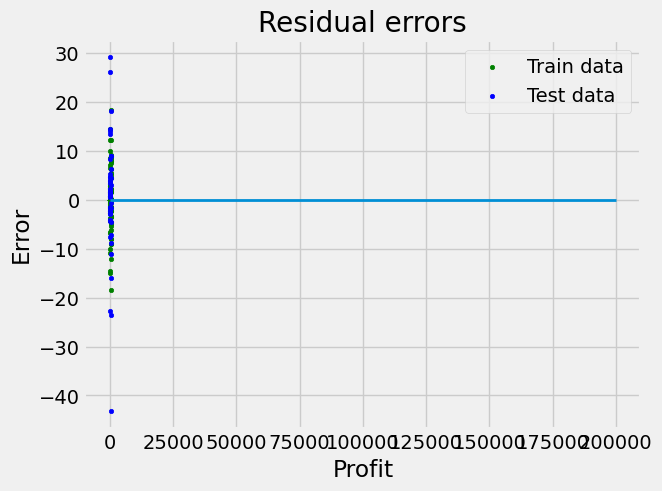

In [29]:
plt.style.use('fivethirtyeight')
plt.scatter(multi_regressor.predict(X_train), multi_regressor.predict(X_train)-y_train, color = "green", s = 10, label = 'Train data')
plt.scatter(multi_regressor.predict(X_test), multi_regressor.predict(X_test)-y_test, color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 200000, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.xlabel("Profit")
plt.ylabel("Error")
plt.show()

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7.393544555859181
MSE: 129.67217042849558
RMSE: 11.387368898410887


# APPLYING MULTIPLE REGRESSION ON SUBSET OF PREDICTORS

In [46]:
X = dataset[['MAKE', 'MODEL', 'FUELTYPE', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y = dataset['CO2EMISSIONS']

In [47]:
ct= ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), ['MAKE', 'MODEL', 'FUELTYPE'])], remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 0)
X_train.shape

(149, 174)

In [55]:
multi_regressor = LinearRegression()
multi_regressor.fit(X_train,y_train)

LinearRegression()

In [56]:
y_pred = multi_regressor.predict(X_test)

In [57]:
print(multi_regressor.coef_)
print(multi_regressor.intercept_)

[-1.63311712e+00  1.38750841e+00  2.05237503e+00 -9.14726784e-02
 -9.97723788e-01 -3.85542017e-01  9.54998816e-01 -1.28702666e+00
 -1.16965138e+00 -1.38965567e+00  5.19450082e-01  5.19450082e-01
 -1.33964495e+00 -3.33066907e-13 -1.04966854e+00 -1.04966854e+00
 -1.11299556e+00 -8.32999850e-01 -2.62900812e-13 -1.50963852e+00
 -1.04966854e+00 -1.11299556e+00 -1.35003120e-13 -1.38965567e+00
 -1.04966854e+00  4.85610161e+00  3.33066907e-16 -5.93034159e-01
  8.06749721e-01  7.06728278e-01 -1.27300843e+00  7.10542736e-15
  1.06581410e-14  1.77635684e-15  0.00000000e+00 -9.43689571e-16
  0.00000000e+00 -2.23131022e-01 -7.54951657e-15 -3.30979095e+00
  4.44089210e-15 -3.07980596e+00 -2.51981453e+00  3.92598564e+00
 -2.74315442e+00  3.92598564e+00 -3.98645571e+00  4.70598135e+00
 -2.39869334e+00  5.48597706e+00 -2.31293123e+00 -1.51297412e+00
 -1.29296983e+00 -8.77076189e-15  9.10382880e-15  7.06728278e-01
 -2.27452533e+00 -3.37782001e-15  4.32808081e-01 -2.71618989e-02
  4.14018246e+00  7.67001

In [58]:
print('Variance score: {}'.format(multi_regressor.score(X_test, y_test)))

Variance score: 0.9733072615893977


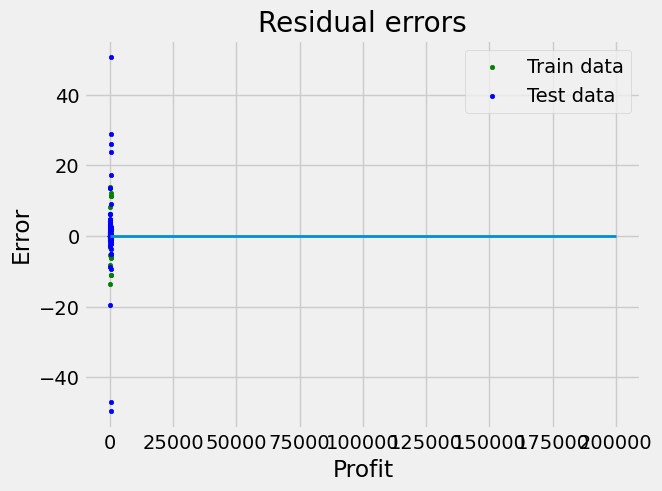

In [59]:
plt.style.use('fivethirtyeight')
plt.scatter(multi_regressor.predict(X_train), multi_regressor.predict(X_train)-y_train, color = "green", s = 10, label = 'Train data')
plt.scatter(multi_regressor.predict(X_test), multi_regressor.predict(X_test)-y_test, color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 200000, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.xlabel("Profit")
plt.ylabel("Error")
plt.show()

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4.630432042274305
MSE: 110.40937408331236
RMSE: 10.50758650134808


# **POLYNOMIAL REGRESSION**





In [61]:
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [62]:
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly_train, y_train)

LinearRegression()

In [63]:
y_poly = poly_regressor.predict(poly.fit_transform(X_test))

In [64]:
print(poly_regressor.coef_)
print(poly_regressor.intercept_)

[-5.67879077e-14  7.65302285e-03  3.19637103e-04 ...  4.18147385e-02
 -3.38426265e-02 -1.37896841e-02]
95.36406651306169


In [65]:
print('Variance score:', poly_regressor.score(X_poly_test, y_test))

Variance score: 0.9277577670999625


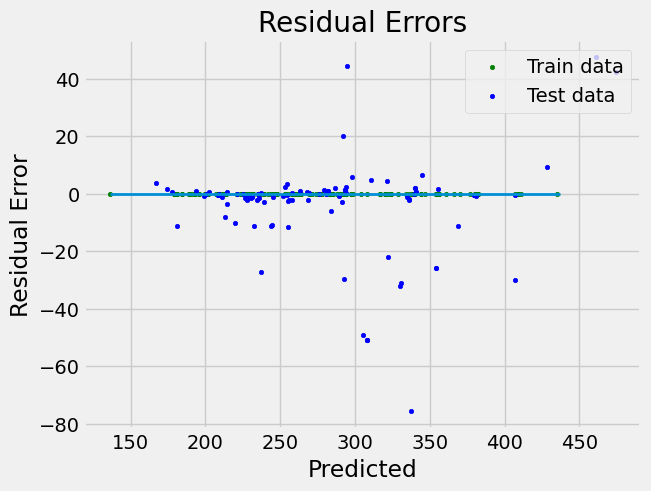

In [66]:
plt.style.use('fivethirtyeight')
plt.scatter(poly_regressor.predict(X_poly_train), poly_regressor.predict(X_poly_train) - y_train, color="green", s=10, label='Train data')
plt.scatter(poly_regressor.predict(X_poly_test), poly_regressor.predict(X_poly_test) - y_test, color="blue", s=10, label='Test data')
plt.hlines(y=0, xmin=min(y), xmax=max(y), linewidth=2)
plt.legend(loc='upper right')
plt.title("Residual Errors")
plt.xlabel("Predicted")
plt.ylabel("Residual Error")
plt.show()

In [67]:
print('MAE:', metrics.mean_absolute_error(y_test, y_poly))
print('MSE:', metrics.mean_squared_error(y_test, y_poly))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_poly)))

MAE: 8.612324298813276
MSE: 298.81608976117195
RMSE: 17.286297745936576
